<a href="https://colab.research.google.com/github/srilatha4567/aiml_task7/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Evaluation Metrics ---
Accuracy:  0.80
Precision: 0.78
Recall:    0.68
F1-Score:  0.73


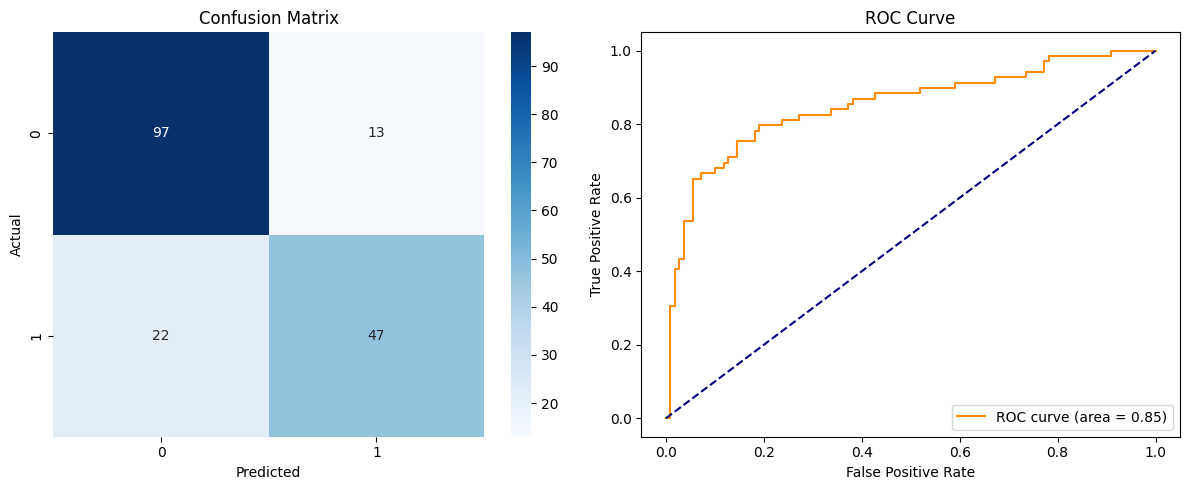

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, classification_report)

# 1. Load Dataset (Hint #1)
df = sns.load_dataset('titanic')

# 2. Handle Missing Values (Hint #2)
# Using median for Age and mode for Embarked
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 3. Remove unnecessary columns (Hint #3)
# Removing redundant or non-predictive columns
cols_to_drop = ['who', 'adult_male', 'deck', 'embark_town', 'alive', 'class']
df = df.drop(columns=cols_to_drop)

# 4. Encode Categorical Features (Hint #4)
# Using get_dummies for OneHotEncoding on 'sex' and 'embarked'
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# 5. Feature Scaling (Hint #5)
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# 6. Train-Test Split (Hint #6)
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. Train Logistic Regression (Hint #7)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # For ROC Curve

# 8. Evaluation Metrics (Hint #8)
print("--- Evaluation Metrics ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.2f}")

# 9. Plot ROC Curve and AUC (Hint #9)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Subplot 2: ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

1. Data Cleaning & Preprocessing

Missing Values: Addressed gaps in the dataset by filling missing values in Age with the median and Embarked with the mode.

Feature Selection: Removed non-predictive columns like PassengerId and Name to streamline the model.

Encoding & Scaling: Applied One-Hot Encoding to categorical features and StandardScaler to numerical columns like Fare and Age to ensure stable model training.

2. Model Training & Evaluation

Algorithm: Implemented Logistic Regression to predict the binary outcome of survival.

Validation: Split the dataset into training and testing sets while maintaining similar class distributions.

Metrics: Evaluated the model using Accuracy, Precision, Recall, and F1-score to get a comprehensive view of performance.

3. Advanced Analysis

Confusion Matrix: Generated a matrix to visualize True Positives versus False Negatives.

ROC Curve & AUC: Plotted the ROC curve and calculated the AUC score to measure the model's ability to distinguish between survivors and non-survivors across different thresholds.